In [2]:
from __future__ import print_function

import lasagne
import theano
import theano.tensor as T
import os
import time
import plac
import numpy as np
import pickle
import hickle
import sklearn.cross_validation
import skimage.transform
import matplotlib.pyplot as plt
%matplotlib inline

WARNING (theano.gof.compilelock): Overriding existing lock by dead process '21367' (I am process '28108')
Using gpu device 0: GeForce GTX TITAN X (CNMeM is disabled, cuDNN 5103)
/home/Devansh/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)
/home/Devansh/anaconda2/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [3]:
CW_DIR = os.getcwd()
DATA_DIR = CW_DIR + '/data/'
OUTPUT_DIR = CW_DIR + '/output/'

RANDOM_SEED = 42

NUM_CLASSES = 10
IMAGE_W = 70
NUM_CHANNELS = 3

NUM_EPOCHS = 250
BATCH_SIZE = 32
LEARNING_RATE = 0.0001
MOMENTUM = 0.9

np.random.seed(RANDOM_SEED)

In [5]:
def get_data_sampler(dataset, train):

    # load in hickle dataset containing cell label dataset
    d = hickle.load('{}/{}.hkl'.format(DATA_DIR, dataset))

    GROUPS = {
        'NORMAL': 0,
        'Echinocyte': 1,
        'Dacrocyte': 2,
        'Schistocyte': 3,
        'Elliptocyte': 4,
        'Acanthocyte': 5,
        'Target cell': 6,
        'Stomatocyte': 7,
        'Spherocyte': 8,
        'Overlap' : 9
    }

    labels = []
    images = []
    for y, x in zip(d['y'], d['X']):
        labels.append(GROUPS[y])
        images.append(x)
    labels = np.array(labels)
    images = np.array(images)

    sss = sklearn.cross_validation.StratifiedShuffleSplit(
        labels,
        n_iter=1,
        test_size=0.2,
        random_state=RANDOM_SEED,
    )
    if train:
        ix, _ = tuple(sss)[0]
    else:
        _, ix = tuple(sss)[0]

    labels = labels[ix]
    images = images[ix]
    
    images = images / 255. - 0.5

    return images, labels

In [7]:
train_images, train_labels = get_data_sampler("September_1_total_non_overlap", train=True)

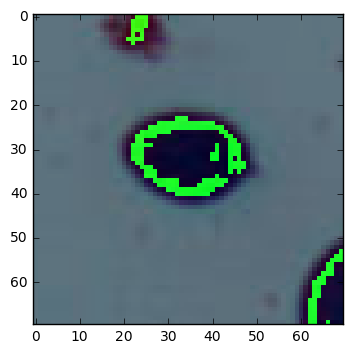

8

In [6]:
plt.imshow(train_images[0], interpolation='none')
# imshow(data, 'gray', origin='lower', interpolation='none')

plt.show()

train_labels[0]

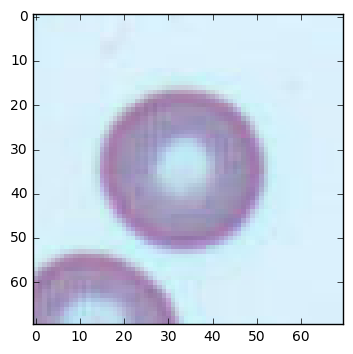

0

In [7]:
plt.imshow(train_images[1], interpolation='none')
plt.show()

train_labels[1]

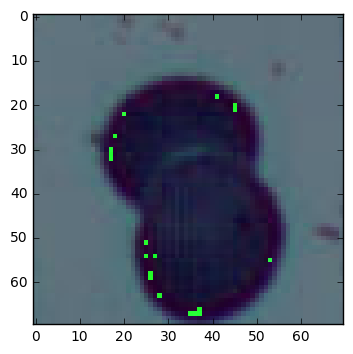

In [51]:
img = train_images[np.nonzero(train_labels==9)[0][10]]
plt.imshow(img, interpolation='none')

In [52]:
plt.imsave('9c.png', img)